<a href="https://colab.research.google.com/github/disuja7/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Book Recommendation System </u></b>

**Project type** - Unsupervised ML

**Contribution** - 

Github link - 

**Index :**

1. [Problem Description](#s1)
2. [Data Description](#s2)
3. [Importing dataset and the libraries](#s3)
4. [Understanding the data](#s4)
5. [Data cleaning and basic feature engineering](#s5)
6. [Exploratory data analysis](#s6)
7. [Data Preprocessing](#s7)
8. [Model Selection](#s8)
9. [Model Implementation](#s9)
10. [Model Explainability](#s10)
11. [Summary and conclusions](#s11)



<a name="s1"></a>
## <b>1. Introduction & Problem Description </b>

During the last few decades, with the rise
of Youtube, Amazon, Netflix, and many
other such web services, recommender
systems have taken more and more place
in our lives. From e-commerce (suggest to
buyers articles that could interest them)
to online advertisement (suggest to users
the right contents, matching their
preferences), recommender systems are
today unavoidable in our daily online
journeys.
In a very general way, recommender
systems are algorithms aimed at
suggesting relevant.
items to users (items being movies to
watch, text to read, products to buy, or
anything else depending on industries).
Recommender systems are really critical
in some industries as they can generate a
huge amount of income when they are
efficient or also be a way to stand out
significantly from competitors. The main
objective is to create a book
recommendation system for users.

### **Businees Goal**
We are required to do basic EDA on the given data for the Amazon web services and analyse some insights from it.
Finally we have to use recommendation system to recommend the unexplored books to the users.

<a name="s2"></a>
## <b>2. Data Description </b>


**The Book-Crossing dataset comprises 3
files.**

**Users:**
Contains the users. Note that user IDs
(User-ID) have been anonymized and map
to integers. Demographic data is provided
(Location, Age) if available. Otherwise,
these fields contain NULL values.

**Books:**
Books are identified by their respective
ISBN. Invalid ISBNs have already been
removed from the dataset. Moreover,
some content-based information is given
(Book-Title, Book-Author, Year-OfPublication, Publisher), obtained from
Amazon Web Services. Note that in the
case of several authors, only the first is
provided. URLs linking to cover images are
also given, appearing in three different
flavours (Image-URL-S, Image-URL-M,
Image-URL-L), i.e., small, medium, large.
These URLs point to the Amazon website.

**Ratings:**
Contains the book rating information.
Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher
values denoting higher appreciation).

<a name="s3"></a>
## <b>3.Importing dataset and the libraries </b>

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
users_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Users.csv")

In [5]:
books_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Books.csv")

In [6]:
ratings_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Ratings.csv")

In [7]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users_df.shape

(278858, 3)

In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
users_df.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [11]:
# checking for null values
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
# checking for duplicate
len(users_df[users_df.duplicated()])

0

**Age distribution**

In [13]:
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

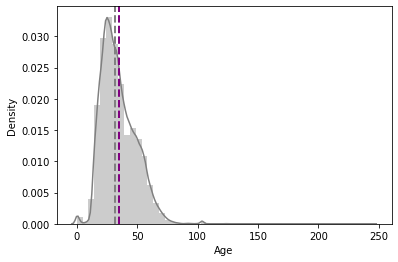

In [14]:
sns.distplot(users_df['Age'],color = 'grey')
plt.axvline((users_df['Age']).median(), color='grey', linestyle='dashed', linewidth=2)
plt.axvline((users_df['Age']).mean(), color='purple', linestyle='dashed', linewidth=2)
plt.show()

In [15]:
users_df['Country'] =  users_df.apply(lambda row: row['Location'].split()[-1],axis=1)

In [16]:
users_df.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,kingdom


In [17]:
users_df['Country'].value_counts().head(10)

usa          139713
canada        21662
kingdom       18539
germany       17043
spain         13148
australia     11784
italy         11266
france         3489
portugal       3325
zealand        3097
Name: Country, dtype: int64

In [18]:
len(users_df['Country'].unique())

1066

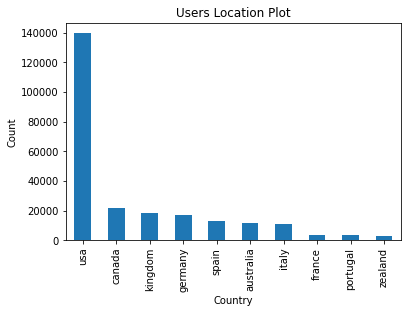

In [19]:
users_df['Country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Users Location Plot')
plt.show()

### **Books Dataset**

In [20]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [21]:
books_df.shape

(271360, 8)

In [22]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [23]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [24]:
books_df.dropna(inplace=True)

In [25]:
books_df.duplicated().sum()

0

In [26]:
# unique books
len(books_df['Book-Title'].unique())

242130

In [27]:
books_df.rename(columns={'ISBN':'Book_ID'},inplace=True)

In [28]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('int32')

In [29]:
books_df['Year-Of-Publication'].value_counts()

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
        ...  
1910        1
1934        1
1914        1
1904        1
2037        1
Name: Year-Of-Publication, Length: 116, dtype: int64

**Rating Dataset**

In [30]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [31]:
ratings_df.shape

(1149780, 3)

In [32]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [33]:
ratings_df['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [34]:
len(ratings_df['User-ID'].unique())

105283

In [35]:
ratings_df.rename(columns={'ISBN':'Book_ID'},inplace=True)

In [36]:
ratings_df.head()

,User-ID,Book_ID,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**Top 10 Authors with maximumm books published and their average rating**

In [37]:
books_with_ratings = books_df.merge(ratings_df,on='Book_ID')
books_with_ratings.head()

,Book_ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [38]:
book_count = books_with_ratings.groupby(['Book-Author'])['Book-Title'].count().reset_index()
avg_rating = books_with_ratings.groupby(['Book-Author'])['Book-Rating'].mean().reset_index()
top_authors_df = book_count.merge(avg_rating,on='Book-Author')

In [39]:
top_authors_df.rename(columns={'Book-Rating':'Avg_Rating','Book-Title':'Books_published'},inplace=True)
top_authors_df=top_authors_df.sort_values(by='Books_published',ascending=False).head(10)
top_authors_df

,Book-Author,Books_published,Avg_Rating
90800,Stephen King,10053,3.606287
73019,Nora Roberts,8429,2.659390
48761,John Grisham,6010,3.192013
42797,James Patterson,5845,3.143713
66132,Mary Higgins Clark,4777,2.634080
21430,Dean R. Koontz,4313,2.589613
95758,Tom Clancy,4036,2.221754
19264,Danielle Steel,3726,2.079442
91813,Sue Grafton,3457,2.758750
43812,Janet Evanovich,3350,3.533731


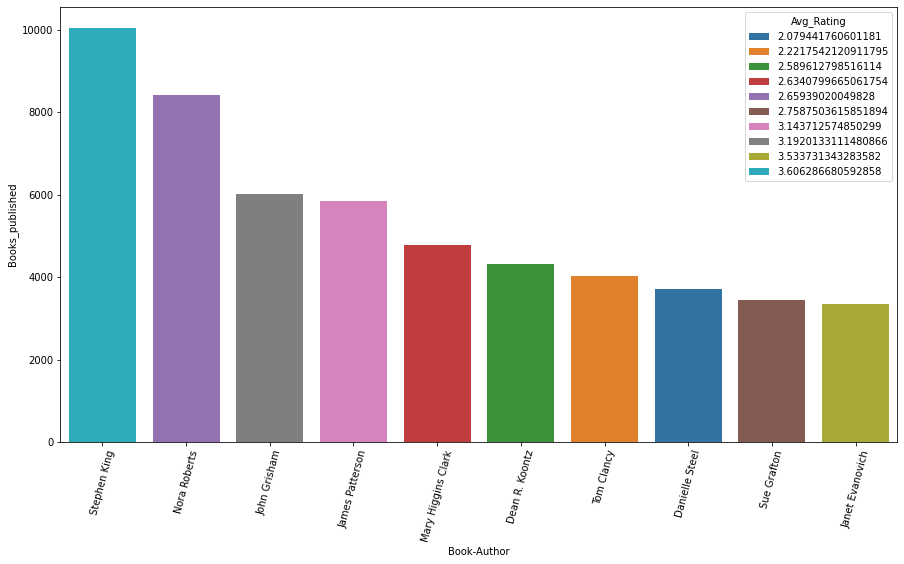

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=top_authors_df,x='Book-Author',y='Books_published',hue='Avg_Rating',dodge=False)
plt.xticks(rotation=75)
plt.show()

**Top 10 Publishers**

In [41]:
book_count = books_with_ratings.groupby(['Publisher'])['Book-Title'].count().reset_index()
avg_rating = books_with_ratings.groupby(['Publisher'])['Book-Rating'].mean().reset_index()
top_publishers_df = book_count.merge(avg_rating,on='Publisher')

In [42]:
top_publishers_df.rename(columns={'Book-Rating':'Avg_Rating','Book-Title':'Books_published'},inplace=True)
top_publishers_df=top_publishers_df.sort_values(by='Books_published',ascending=False).head(10)
top_publishers_df

,Publisher,Books_published,Avg_Rating
1388,Ballantine Books,34724,2.801204
11709,Pocket,31989,2.498671
1714,Berkley Publishing Group,28614,2.424827
15860,Warner Books,25506,2.671293
6556,Harlequin,25027,1.439925
1418,Bantam Books,23598,2.327824
1414,Bantam,20007,2.877193
13593,Signet Book,19155,2.684991
1246,Avon,17352,2.447499
11338,Penguin Books,17033,3.203898


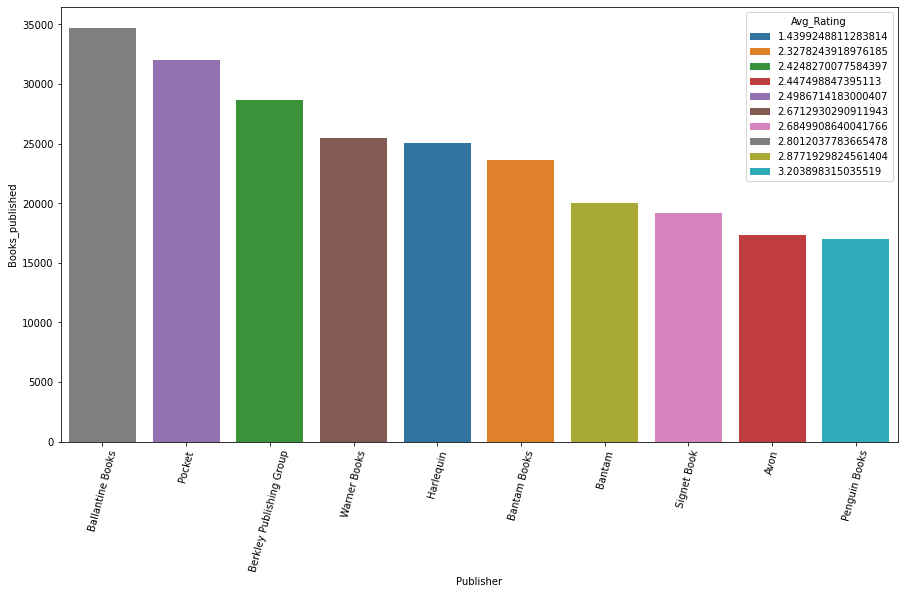

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=top_publishers_df,x='Publisher',y='Books_published',hue='Avg_Rating',dodge=False)
plt.xticks(rotation=75)
plt.show()



---



---



### **Let's Build a Popularity based Recommendations**

In [44]:
books_with_ratings.head()

,Book_ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [45]:
rating_count = books_with_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index(name='Rating_count')
rating_count.head()

,Book-Title,Rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [46]:
avg_rating = books_with_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index(name='Avg_rating')
avg_rating.head()

,Book-Title,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


**Merging above two datasets**

In [47]:
popular_df = rating_count.merge(avg_rating,on='Book-Title')
popular_df.head()

,Book-Title,Rating_count,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [48]:
popular_df.shape

(241066, 3)

**Taking only those books having Rating_count > 250 and sorting them on the basis of Avg_rating.**

In [49]:
popular_df =  popular_df[popular_df['Rating_count']>=250].sort_values('Avg_rating',ascending=False).head(20)
popular_df = popular_df.merge(books_df,on='Book-Title').drop_duplicates('Book-Title')
popular_df.head()

,Book-Title,Rating_count,Avg_rating,Book_ID,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...


In [50]:
popular_df.shape

(20, 10)



---



---



Multiple users has rated the same books and the same users have rated multiple books. So we will consider only those users who has rated more than 100 books and only those books which is rated by more than 50 users.




In [147]:
# Users who have rated more than 100 books
x=ratings_df['User-ID'].value_counts()>100

In [148]:
x[x].shape

(1825,)

In [149]:
y=x[x].index

In [150]:
ratings_df=ratings_df[ratings_df['User-ID'].isin(y)]

In [151]:
ratings_df.shape

(656605, 3)

In [162]:
# counting the number of rating for each book
rating_count=ratings_df.groupby('Book_ID')['Book-Rating'].count().reset_index(name='rating_count')

In [163]:
rating_count.head()

,Book_ID,rating_count
0,0330299891,1
1,0375404120,2
2,0586045007,1
3,9022906116,2
4,9032803328,1


In [170]:
most_viewed_books = rating_count.sort_values(by='rating_count',ascending=False).head(10)
most_viewed_book_ID = most_viewed_books['Book_ID'].tolist()
most_viewed_book_ID


['0971880107',
 '0316666343',
 '0385504209',
 '0060928336',
 '044021145X',
 '0440214041',
 '0440211727',
 '0312195516',
 '067976402X',
 '0446672211']

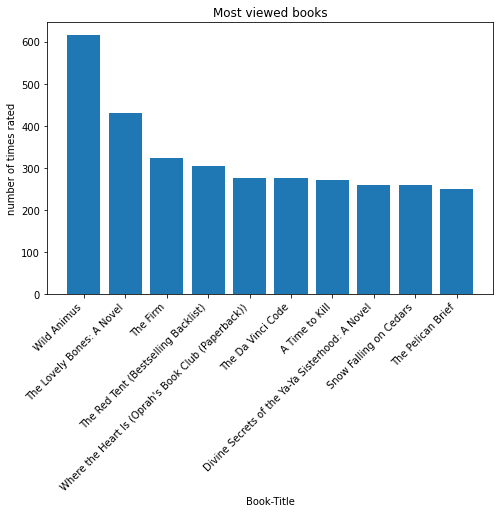

In [173]:
plt.figure(figsize=(8,5))
plt.bar(books_df[books_df['Book_ID'].isin(most_viewed_book_ID)]['Book-Title'], most_viewed_books['rating_count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Book-Title')
plt.ylabel('number of times rated')
plt.title('Most viewed books')
plt.show()

In [174]:
# Creating new Dataframe by merging the above two datasets
ratings_df = ratings_df.merge(rating_count,on='Book_ID') 

In [175]:
ratings_df.shape

(656605, 4)

In [176]:
# considering only those books which has got more than 50 ratings 
ratings_df=ratings_df[ratings_df['rating_count']>=50] 

In [177]:
ratings_df.shape

(72843, 4)

In [178]:
ratings_df.head()

,User-ID,Book_ID,Book-Rating,rating_count
6,276925,002542730X,10,102
7,277427,002542730X,10,102
8,3363,002542730X,0,102
9,10030,002542730X,7,102
10,11676,002542730X,6,102


In [179]:
ratings_df[['User-ID','Book_ID']].duplicated().sum()

0

In [185]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = ratings_df.pivot(index='User-ID', 
                                                          columns='Book_ID', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df

Book_ID,002542730X,0060008032,0060085444,0060096195,006016848X,0060175400,0060199652,0060391626,0060392452,0060502258,...,1558743669,1558744150,1558744630,1558745157,1559029838,1573225789,1573229326,1573229725,1592400876,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [187]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[254, 507, 882, 1424, 1435, 1733, 1903, 2033, 2110, 2276]

In [188]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [189]:
users_items_pivot_matrix.shape

(1777, 841)

In [190]:
U.shape

(1777, 15)

In [191]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [192]:
Vt.shape

(15, 841)

### After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [193]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 0.46618285, -0.07118047, -0.08078674, ...,  0.27927777,
         0.03337594,  0.08815453],
       [-0.00199499, -0.0193906 ,  0.04297164, ...,  0.1166725 ,
         0.06494673,  0.01997613],
       [ 0.14611831, -0.16199462, -0.05925962, ...,  0.1133546 ,
        -0.14179212,  0.34691037],
       ...,
       [-0.01696583,  0.0187561 , -0.01956051, ...,  0.02230937,
        -0.01073462, -0.03631841],
       [ 0.04372193,  0.10498886,  0.04565234, ..., -0.07008312,
         0.04185981,  0.02734976],
       [ 0.00368812,  0.05188245,  0.06656118, ...,  0.0352377 ,
         0.0210702 , -0.03336712]])

In [194]:
all_user_predicted_ratings.shape

(1777, 841)

In [195]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Book_ID,,,,,,,,,,,,,,,,,,,,,
002542730X,0.466183,-0.001995,0.146118,0.058959,0.134340,-0.067526,0.023111,0.448368,-0.057108,0.042888,...,0.0,0.033241,0.179358,0.092511,0.238774,0.0,-0.028684,-0.016966,0.043722,0.003688
0060008032,-0.071180,-0.019391,-0.161995,0.031565,0.035606,0.128196,0.029190,-0.021052,0.065797,0.125946,...,0.0,0.010700,-0.171196,-0.040764,0.088796,0.0,0.032436,0.018756,0.104989,0.051882
0060085444,-0.080787,0.042972,-0.059260,-0.000629,0.007960,-0.039312,-0.004781,0.060811,-0.068999,0.051322,...,0.0,0.011672,-0.040277,0.037442,0.074992,0.0,0.104133,-0.019561,0.045652,0.066561
0060096195,-0.283519,0.002713,-0.299451,0.013075,0.047321,-0.187436,-0.012541,0.111067,-0.166926,0.117257,...,0.0,0.028958,-0.190847,0.045200,0.362216,0.0,0.191690,-0.054483,0.076257,0.044904
006016848X,-0.014976,-0.045347,0.048339,0.024514,0.019438,0.210216,0.023531,-0.150642,0.156539,0.108218,...,0.0,-0.025373,-0.033727,0.021990,0.124065,0.0,-0.018742,0.025423,0.093753,0.028638


In [196]:
len(cf_preds_df.columns)

1777

In [197]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['contentId'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        # if verbose:
        #     if self.items_df is None:
        #         raise Exception('"items_df" is required in verbose mode')

        #     recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
        #                                                   left_on = 'Book_ID', 
        #                                                   right_on = 'Book_ID')[['recStrength', 'Book_ID', 'title', 'url', 'lang']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, books_df)